# Chapter 5: Causal Model Discovery from Data

## Key Points Learned in this chapter

### 1. Explore Core Families of Causal Discovery Techniques  
Gain practical insights into representative methods across five categories.

### 2. Evaluate the Quality of Causal Models  
Use metrics to assess the performance of learned causal graphs.

### 3. Perform Interventions and Counterfactual Reasoning  
Apply structural models to simulate interventions and conduct counterfactual analysis, enabling causal inference beyond observation.

---

### 1. Introduction to Causal Model Discovery

Causal model discovery identifies cause-effect relationships between variables using data. It is particularly useful in observational data where controlled experiments are impractical or impossible. Unlike correlation, which only measures statistical dependencies between variables, causal discovery seeks to uncover which variables influence others directly, enabling more accurate predictions and interventions.

#### Healthcare Example: Causal Links Between Lifestyle and Health Outcomes
In healthcare, causal discovery is used to understand how lifestyle factors (e.g., smoking, exercise) impact health outcomes such as heart disease and diabetes. Causal models help in identifying which factors to target for preventive measures.

**Visualization: Correlation Matrix**


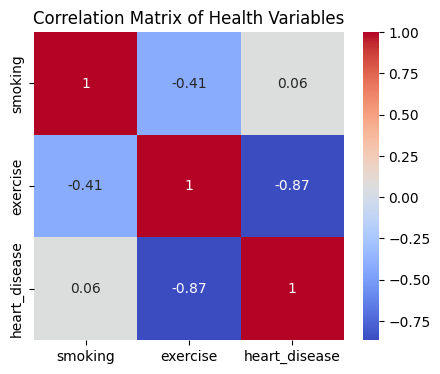

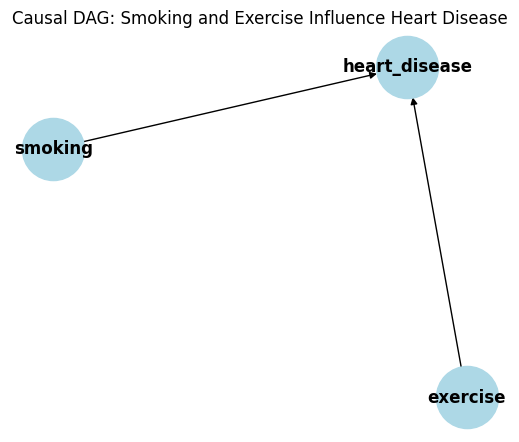

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

# Hypothetical health dataset (replace with real data)
df = pd.DataFrame({
    'smoking': [5, 20, 15, 7, 10],
    'exercise': [3, 2, 5, 6, 4],
    'heart_disease': [1, 1, 0, 0, 1]
})

# Visualize correlations between variables
plt.figure(figsize=(5, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Health Variables')
plt.show()

# Create a Directed Acyclic Graph (DAG) representing causal assumptions
G = nx.DiGraph()

# Add edges according to causal assumptions
G.add_edge('smoking', 'heart_disease')
G.add_edge('exercise', 'heart_disease')

# Visualize the DAG
plt.figure(figsize=(5, 4))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=12, font_weight='bold', arrows=True)
plt.title("Causal DAG: Smoking and Exercise Influence Heart Disease")
plt.show()



In this example, we plot a correlation matrix to observe the relationships between three variables: smoking, exercise, and heart disease. The correlation matrix shows how strongly each pair of variables is related to each other, but it does not imply causality. For example, smoking might have a strong correlation with heart disease, but to truly understand the causal relationship, we need more advanced methods like those in this chapter.


---

## 2. Methods of Causal Discovery

Causal discovery methods aim to infer causal relationships from observational data. These methods can be broadly categorized into three main groups, each with its own strengths and assumptions. We'll explore these categories and delve deeper into the PC Algorithm as an example of independence-based methods.


### 2.1 Overview of Causal Discovery Methods

Causal discovery seeks to infer causal relationships from data by learning the structure of a **causal graph**, typically a **Directed Acyclic Graph (DAG)**. When randomized experiments are infeasible, algorithmic approaches provide tools to recover causal structure under specific assumptions.

This section presents five major families of causal discovery methods:

1. Independence-Based Methods  
2. Score-Based Methods  
3. Functional Causal Models (FCMs)  
4. Machine Learning and AI-Based Methods  
5. Hybrid Methods with Expert Knowledge

---

### 1. Independence-Based Methods

**Definition:**  
These methods use statistical **conditional independence (CI) tests** between variables to infer the structure of a DAG. They exploit the fact that missing edges correspond to conditional independencies under the Causal Markov and Faithfulness assumptions.

**Key Algorithms:**  
- PC (Peter-Clark) Algorithm  
- FCI (Fast Causal Inference)  
- RFCI (Really Fast Causal Inference)

**Assumptions:**  
- Causal Markov Condition  
- Faithfulness  
- Causal sufficiency (no hidden confounders), unless handled explicitly (e.g., by FCI)

**Strengths:**  
- Scalable to high-dimensional settings  
- Well-established statistical foundation  
- Efficient at learning Markov equivalence classes

**Limitations:**  
- Sensitive to CI test errors and noise  
- Reduced performance in small samples  
- Cannot fully resolve all causal directions

---

### 2. Score-Based Methods

**Definition:**  
These methods define a **scoring function** (e.g., BIC, BDeu) to evaluate how well a DAG fits the data, balancing model fit and complexity. The causal graph is discovered by optimizing this score across possible graph structures.

**Key Algorithms:**  
- GES (Greedy Equivalence Search)  
- Hill-Climbing with BIC/BDeu  
- NOTEARS (Neural Optimization for DAGs)

**Assumptions:**  
- Acyclicity constraint  
- Reliable scoring metric  
- Faithfulness and sufficient sample size

**Strengths:**  
- Can incorporate prior domain knowledge  
- Performs well on moderate-sized datasets  
- Optimizes global structure

**Limitations:**  
- Computationally expensive in high-dimensional settings  
- Risk of local optima  
- Sensitive to choice of score and priors

---

### 3. Functional Causal Models (FCMs)

**Definition:**  
FCMs assume that each variable is generated by a deterministic **function** of its causal parents plus an **independent noise term**, making it possible to identify causal directionality.

$
X_i = f_i(\text{Pa}(X_i)) + \varepsilon_i, \quad \varepsilon_i \perp \text{Pa}(X_i)
$

**Key Algorithms:**  
- LiNGAM (Linear Non-Gaussian Acyclic Model)  
- ANM (Additive Noise Models)  
- PNL (Post-Nonlinear Models)

**Assumptions:**  
- Functional relationships between variables  
- Independence between noise and inputs  
- Non-Gaussianity or nonlinearity for identifiability

**Strengths:**  
- Capable of identifying causal direction in two-variable settings  
- Does not rely on full CI testing  
- Performs well under correct model assumptions

**Limitations:**  
- Requires strong structural assumptions  
- Sensitive to misspecification  
- Scalability challenges for high-dimensional graphs


---

### 4. Machine Learning and AI-Based Methods

**Definition:**  
These methods leverage modern **machine learning** techniques (e.g., neural networks, variational inference, attention mechanisms) to learn causal structures from high-dimensional or nonlinear data.

**Key Algorithms:**  
- NOTEARS (DAG learning with continuous optimization)  
- DAG-GNN (Graph Neural Networks + variational inference)  
- IGL (Invariant Graph Learning across environments)  
- RECI (Regression Error Causal Inference)  
- Causal Transformers

**Assumptions:**  
- DAG acyclicity enforced through optimization or constraints  
- Structural patterns can be learned from data  
- Often require large-scale datasets

**Strengths:**  
- Scalable to large and complex datasets  
- Flexible model architectures  
- Can handle nonlinearity and latent structure

**Limitations:**  
- Computationally demanding  
- Requires careful model selection and validation  
- Reduced interpretability compared to classical approaches

---

### 5. Hybrid Methods with Expert Knowledge

**Definition:**  
Hybrid methods combine multiple approaches—such as **constraint-based**, **score-based**, and **expert-informed priors**—to guide structure learning more efficiently and robustly.

**Key Algorithms:**  
- MMHC (Max-Min Hill Climbing)  
- GFCI (Generalized FCI with background knowledge)  
- NOTEARS with constraints  
- BCCD (Bayesian Constraint-Based Discovery)

**Assumptions:**  
- Validity of partial expert knowledge  
- Causal Markov and Faithfulness assumptions  
- Availability of sufficient data or constraints

**Strengths:**  
- Reduces false positives by constraining the search space  
- Incorporates temporal or domain knowledge  
- Suitable for small or noisy datasets

**Limitations:**  
- Performance depends on accuracy of expert knowledge  
- Implementation complexity  
- Requires proper integration of multiple components

---

## Summary Comparison Table

| Method Type                | Mechanism                          | Strengths                                   | Limitations                                  |
|----------------------------|-------------------------------------|----------------------------------------------|----------------------------------------------|
| Independence-Based         | Conditional independence testing    | Scalable, statistically grounded             | Sensitive to noise, partial orientation      |
| Score-Based                | DAG search via scoring functions    | Flexible, supports priors                    | Computationally costly, local optima risk    |
| Functional Causal Models   | Functional equations + noise terms  | Identifies direction, interpretable          | Assumption-heavy, low scalability            |
| ML/AI-Based                | Neural nets + optimization          | Nonlinear, scalable, expressive              | Requires large data, less interpretable      |
| Hybrid with Expert Knowledge | Constraints + priors + heuristics | Domain-guided, robust, interpretable         | Depends on expert input, integration effort  |

---


### 2.2. Example of Independence-Based Methods: The PC Algorithm

The **PC Algorithm**, developed by Peter Spirtes and Clark Glymour, is a foundational algorithm in the field of causal discovery. It belongs to the class of **independence-based** (or constraint-based) methods, which use **conditional independence (CI) tests** to recover the underlying causal structure from observational data.  
([Reference](https://applied-informatics-j.springeropen.com/articles/10.1186/s40535-016-0018-x))

---

#### Key Assumptions

1. **Causal Markov Condition**  
   Given a true causal DAG $G$, each variable is independent of its non-descendants conditional on its parents.

2. **Faithfulness Condition**  
   All and only the conditional independence relations in the data are entailed by the DAG $G$ and the Markov property. That is, there are no spurious independencies due to parameter cancellations.

---

#### Conditional Independence Framework

The PC algorithm tests statements of the form:

$$
X_i \perp X_j \mid \mathbf{S}
$$

where $X_i$ and $X_j$ are variables, and $\mathbf{S}$ is a subset of the remaining variables. The symbol $\perp$ denotes statistical independence.

---

#### Algorithm Steps

1. **Initialization**  
   Begin with a complete undirected graph in which all variables are connected.

2. **Edge Removal (Skeleton Learning)**  
   - Test for marginal independence: $X_i \perp X_j$. Remove the edge if the test indicates independence.
   - For increasing conditioning set sizes:
     - Test for conditional independence: $X_i \perp X_j \mid \mathbf{S}$
     - If a separating set $\mathbf{S}$ is found, remove the edge $(X_i, X_j)$.

3. **Edge Orientation**  
   - Identify **v-structures** (colliders):  
     $$X_i \rightarrow X_k \leftarrow X_j$$  
     where $X_i$ and $X_j$ are not adjacent, and $X_k$ is not in the separating set of $X_i$ and $X_j$.
   - Apply orientation propagation rules (e.g., Meek’s rules) to orient further edges without introducing cycles.

---

#### Conditional Independence Testing

- **For Gaussian Data**:  
  Use **partial correlation tests** to assess CI. The partial correlation between $X_i$ and $X_j$ given a conditioning set $\mathbf{S}$ is:

  $$
  \rho_{X_i,X_j|\mathbf{S}} = \frac{\rho_{X_i,X_j} - \rho_{X_i,\mathbf{S}}\rho_{X_j,\mathbf{S}}}
  {\sqrt{(1 - \rho_{X_i,\mathbf{S}}^2)(1 - \rho_{X_j,\mathbf{S}}^2)}}
  $$

- **For Discrete Data**:  
  Conditional independence can be assessed using the **G-test** or **Chi-squared test**.

---

#### Example: Disease–Symptom Causal Discovery

The PC algorithm can be used to infer causal relationships in medical diagnosis. Consider a domain with variables such as:

- *Tuberculosis*, *Smoking*, *Lung Cancer* (diseases)
- *Cough*, *Dyspnea* (symptoms)

The algorithm learns the structure by testing statistical independencies among these variables, uncovering which conditions likely cause which symptoms. This supports downstream tasks such as intervention planning and predictive diagnosis.


  0%|          | 0/5 [00:00<?, ?it/s]

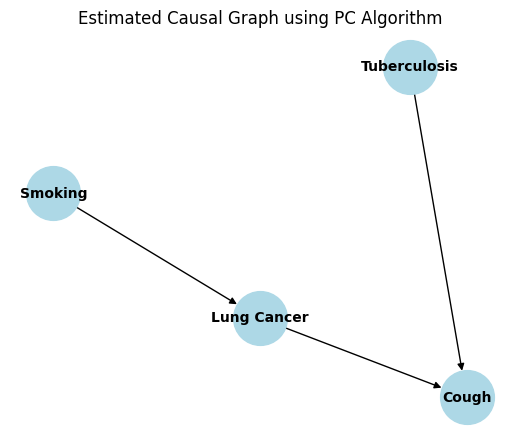

In [98]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.estimators import PC
from pgmpy.independencies import Independencies

# Generate synthetic data
np.random.seed(42)
n_samples = 1000

# Simulate causal relationships
tuberculosis = np.random.binomial(1, 0.05, n_samples)
smoking = np.random.binomial(1, 0.2, n_samples)
lung_cancer = np.random.binomial(1, 0.01 + 0.1*tuberculosis + 0.3*smoking, n_samples)
cough = np.random.binomial(1, 0.1 + 0.6*tuberculosis + 0.3*lung_cancer, n_samples)

data = pd.DataFrame({
    'Tuberculosis': tuberculosis,
    'Smoking': smoking,
    'Lung Cancer': lung_cancer,
    'Cough': cough
})

# Apply PC algorithm
pc = PC(data)
estimated_model = pc.estimate()

# Visualize the result with a smaller DAG
G = nx.DiGraph()
G.add_edges_from(estimated_model.edges())

# Adjust the figure size to make the DAG smaller
pos = nx.spring_layout(G)
plt.figure(figsize=(5, 4))  # Smaller figure size
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500, font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): '' for (u, v) in G.edges()})
plt.title("Estimated Causal Graph using PC Algorithm")
plt.show()


After applying the PC algorithm, a causal graph is generated showing the relationships between diseases (e.g., tuberculosis, bronchitis) and symptoms (e.g., dyspnea). 

---

## 2.3. Example of Score-Based Methods: Greedy Equivalence Search (GES)

**Score-based methods** aim to identify the causal graph that best explains the observed data according to a predefined **scoring function**, which typically balances model fit and complexity. Among these, **Greedy Equivalence Search (GES)** is a well-established and computationally efficient algorithm.  
([Reference](https://www.jmlr.org/papers/volume3/chickering02b/chickering02b.pdf))

---

### Overview of Greedy Equivalence Search (GES)

GES, introduced by Chickering (2002), is a two-phase greedy algorithm that explores the space of causal graphs. Rather than searching over individual DAGs, it operates over **equivalence classes** of DAGs, represented as **Completed Partially Directed Acyclic Graphs (CPDAGs)**.

**Key Features:**
1. Begins with an empty graph (no edges).
2. **Forward Phase**: Greedily adds edges that improve the score.
3. **Backward Phase**: Greedily removes edges that further improve the score.
4. Searches over **Markov equivalence classes** rather than single DAGs.
5. Guaranteed to find the optimal graph under certain assumptions.

---

### Scoring Function: Bayesian Information Criterion (BIC)

GES often uses the **Bayesian Information Criterion (BIC)** to evaluate candidate graphs. BIC penalizes complexity to avoid overfitting.

The BIC score for a model $M$ is defined as:

$$
\text{BIC}(M) = \log \mathcal{L}(M \mid D) - \frac{k \log N}{2}
$$

Where:
- $\mathcal{L}(M \mid D)$ is the likelihood of model $M$ given data $D$,
- $k$ is the number of parameters in the model,
- $N$ is the number of data samples.

The first term favors goodness-of-fit; the second penalizes complexity.

---

### Algorithm Steps

#### 1. Forward Phase  
Start with an empty graph and iteratively add edges that result in the largest increase in the BIC score.

For each potential edge addition $e$:

$$
\Delta \text{BIC}(e) = \text{BIC}(M_{\text{new}}) - \text{BIC}(M_{\text{current}})
$$

Add the edge $e$ with the highest positive $\Delta \text{BIC}(e)$.

#### 2. Backward Phase  
Starting from the graph obtained in the forward phase, iteratively remove edges that yield the largest improvement in BIC.

For each potential edge removal $e$:

$$
\Delta \text{BIC}(e) = \text{BIC}(M_{\text{new}}) - \text{BIC}(M_{\text{current}})
$$

Remove the edge $e$ with the highest positive $\Delta \text{BIC}(e)$.

#### 3. Stopping Criterion  
Terminate the search when no further edge addition or removal improves the BIC score.

---

### Theoretical Guarantees

Under the following assumptions, GES is **asymptotically consistent**—that is, it can recover the true causal structure up to a Markov equivalence class:

- The true causal graph is a DAG.
- Data is generated from a multivariate Gaussian distribution (or an appropriate model class).
- The sample size is sufficiently large.
- No latent confounders (causal sufficiency holds).

---

### Advantages and Limitations

**Advantages:**
- Efficient in high-dimensional settings.
- Balances data fit and model complexity.
- Theoretically grounded with consistency guarantees.

**Limitations:**
- Assumes causal sufficiency (no hidden confounders).
- Sensitive to sample size and choice of scoring function.
- May not perform well with non-Gaussian or nonlinear dependencies.

---

### Example: Causal Discovery Among Economic Indicators

Consider a set of macroeconomic variables, such as:
- **GDP**
- **Inflation**
- **Unemployment**
- **Interest Rates**

Using GES, we aim to identify the causal influences among these variables. For example, the algorithm may discover that **GDP** causally influences **unemployment**, which in turn affects **inflation** and **interest rates**. This structure enables economists to simulate the impact of policy interventions, such as changing interest rates, on employment and inflation outcomes.



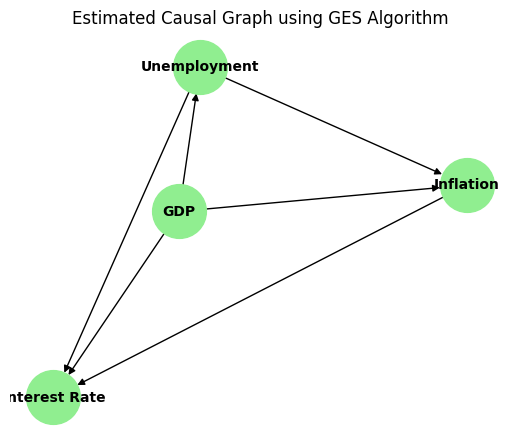

In [101]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.estimators import ExhaustiveSearch

# Generate synthetic economic data
np.random.seed(42)
n_samples = 1000

gdp = np.random.normal(0, 1, n_samples)
unemployment = -0.5 * gdp + np.random.normal(0, 0.5, n_samples)
inflation = 0.3 * gdp - 0.2 * unemployment + np.random.normal(0, 0.5, n_samples)
interest_rate = 0.4 * inflation + np.random.normal(0, 0.3, n_samples)

data = pd.DataFrame({
    'GDP': gdp,
    'Unemployment': unemployment,
    'Inflation': inflation,
    'Interest Rate': interest_rate
})

# Apply GES (using ExhaustiveSearch as a substitute)
es = ExhaustiveSearch(data)
best_model = es.estimate()

# Visualize the result with a smaller DAG
G = nx.DiGraph()
G.add_edges_from(best_model.edges())

# Adjust the figure size, node size, and font size for a smaller DAG
pos = nx.spring_layout(G)
plt.figure(figsize=(5, 4))  # Reduced figure size
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=1500, font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): '' for (u, v) in G.edges()})
plt.title("Estimated Causal Graph using GES Algorithm")
plt.show()


The GES algorithm estimates a causal graph between macroeconomic variables such as inflation, interest rates, and unemployment. The estimated graph shows which factors influence others. For instance, the graph might show that inflation causally affects interest rates. The precision of this estimation is influenced by the scoring criterion (such as BIC) used in GES.

---

## 2.4 Example of Functional Causal Discovery: LiNGAM and Additive Noise Models (ANM)

**Functional causal discovery methods** aim to recover causal relationships by making explicit assumptions about the **functional form** of the data-generating mechanisms and the **properties of noise terms**. Two widely used approaches in this category are:

- **LiNGAM**: Linear Non-Gaussian Acyclic Model  
- **ANM**: Additive Noise Model

These models allow identifiability of causal directions even in pairwise relationships, which is not possible using conditional independence or score-based approaches alone.

---

### LiNGAM (Linear Non-Gaussian Acyclic Model)

The **LiNGAM** model, introduced by Shimizu et al. (2006), assumes **linear** relationships between variables and **non-Gaussian** independent noise terms. It overcomes the limitations of traditional methods that rely on Gaussianity, where the causal direction is not identifiable.

([Reference](https://www.jmlr.org/papers/volume7/shimizu06a/shimizu06a.pdf))

**Key Assumptions:**
- The system follows a linear structural equation model.
- The noise variables are **non-Gaussian** and **mutually independent**.
- The causal structure is acyclic (DAG).

#### Mathematical Formulation

LiNGAM assumes that each variable $X_i$ is generated by a linear combination of its parents:

$$
X_i = \sum_{j \in \text{Pa}(i)} a_{ij} X_j + e_i
$$

Where:
- $\text{Pa}(i)$ denotes the set of parent nodes of $X_i$ in the DAG.
- $a_{ij}$ are the causal coefficients.
- $e_i$ is an **independent**, **non-Gaussian** noise term.

**Identifiability**:  
The non-Gaussianity of $e_i$ is essential. It allows the model to recover the full causal ordering via **Independent Component Analysis (ICA)**—something not possible under Gaussian assumptions.

---

### Additive Noise Models (ANM)

**Additive Noise Models**, introduced by Hoyer et al. (2009), generalize functional causal models to **nonlinear** systems, while preserving the assumption that noise is additive and independent of the cause.

([Reference](https://proceedings.neurips.cc/paper/2008/file/f7664060cc52bc6f3d620bcedc94a4b6-Paper.pdf))

**Key Assumptions:**
- The effect is generated by a deterministic function of the cause plus additive noise.
- The noise term is independent of the input (cause).
- The model is acyclic.

#### Mathematical Formulation

In a bivariate case where $X$ causes $Y$, the model is:

$$
Y = f(X) + \varepsilon_Y \quad \text{with} \quad \varepsilon_Y \perp X
$$

Where:
- $f(\cdot)$ is a (possibly nonlinear) function.
- $\varepsilon_Y$ is a noise term independent of $X$.
- $\perp$ denotes statistical independence.

**Causal Directionality**:  
The independence between $X$ and $\varepsilon_Y$ typically holds only in the **true causal direction**. When modeling in the reverse direction (i.e., $X = g(Y) + \varepsilon_X$), this independence is usually violated—providing a testable criterion for causality.

---

### Comparison: LiNGAM vs. ANM

| Feature                | LiNGAM                         | Additive Noise Model (ANM)          |
|------------------------|--------------------------------|-------------------------------------|
| Functional Form        | Linear                         | Nonlinear (flexible)                |
| Noise Assumption       | Non-Gaussian                   | Independent of cause                |
| Dimensionality         | Multivariate                   | Best suited for bivariate cases     |
| Identifiability        | Full structure (DAG)           | Causal direction (pairwise)         |
| Computational Cost     | Low (linear algebra + ICA)     | Higher (nonlinear regression + tests) |

---

### Practical Considerations

- **Use LiNGAM** when you expect **linear** dependencies and the noise is clearly **non-Gaussian**.
- **Use ANM** when relationships are suspected to be **nonlinear**, especially in small bivariate problems.
- Both methods assume **no unmeasured confounders** and **no feedback loops**.

---

### Example: Gene Expression and Disease Outcome

In biomedical research, LiNGAM can be applied to model **causal relationships between gene expression levels and disease phenotypes**. Suppose we have expression levels of three genes and an observed binary disease outcome. LiNGAM can reveal:

- Which genes causally influence each other.
- Which gene(s) directly affect disease progression.

This causal understanding supports **targeted intervention strategies** and helps in **biomarker discovery**.




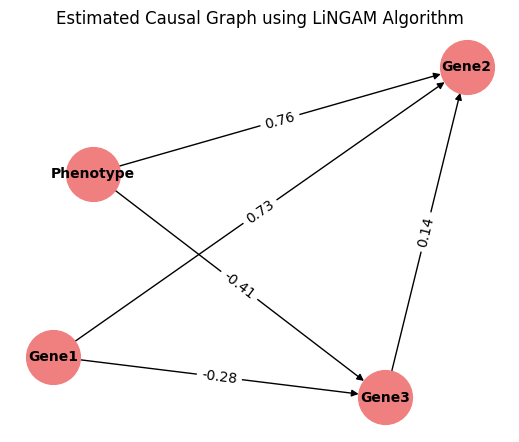

In [104]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from lingam import DirectLiNGAM

# Generate synthetic gene expression data
np.random.seed(42)
n_samples = 1000

gene1 = np.random.normal(0, 1, n_samples)
gene2 = 0.5 * gene1 + np.random.normal(0, 0.5, n_samples)
gene3 = -0.3 * gene1 + 0.4 * gene2 + np.random.normal(0, 0.5, n_samples)
phenotype = 0.6 * gene2 - 0.4 * gene3 + np.random.normal(0, 0.3, n_samples)

data = pd.DataFrame({
    'Gene1': gene1,
    'Gene2': gene2,
    'Gene3': gene3,
    'Phenotype': phenotype
})

# Scale the data
scaled_data = scale(data)

# Apply LiNGAM
model = DirectLiNGAM()
model.fit(scaled_data)

# Visualize the result with a smaller DAG
G = nx.DiGraph()
for i, j in zip(*np.where(model.adjacency_matrix_ != 0)):
    G.add_edge(data.columns[i], data.columns[j])

# Adjust the figure size, node size, and font size for a smaller DAG
pos = nx.spring_layout(G)
plt.figure(figsize=(5, 4))  # Reduced figure size
nx.draw(G, pos, with_labels=True, node_color='lightcoral', node_size=1500, font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f'{model.adjacency_matrix_[list(G.nodes()).index(u), list(G.nodes()).index(v)]:.2f}' for (u, v) in G.edges()})
plt.title("Estimated Causal Graph using LiNGAM Algorithm")
plt.show()


The LiNGAM algorithm estimates a causal graph showing relationships between gene expressions and a phenotype (disease outcome). Each edge in the graph is weighted, indicating the strength of the causal relationship between genes and the disease. For example, the result may show that gene 1 causally affects gene 2, and gene 2 in turn affects the disease. The weights on the edges provide insights into how strongly these genes influence each other and the disease.

---

## 2.5 Example of ML/AI-Based Methods: NOTEARS

**NOTEARS** (Non-combinatorial Optimization via Trace Exponential and Augmented lagRangian for Structure learning) is a modern causal discovery method that formulates DAG learning as a **continuous optimization** problem. Introduced by Zheng et al. (2018), NOTEARS departs from traditional constraint-based and score-based methods by leveraging **gradient-based optimization** to learn the graph structure directly.

([Reference](https://proceedings.neurips.cc/paper/2018/file/e347c51419ffb23ca3fd5050202f9c3d-Paper.pdf))

---

### Key Concepts

1. **Continuous Relaxation**: The combinatorial DAG learning problem is reformulated into a differentiable optimization problem over real-valued adjacency matrices.
2. **Acyclicity Constraint**: A novel smooth constraint is introduced to enforce that the learned graph is acyclic.
3. **Gradient-Based Optimization**: Enables efficient use of modern numerical solvers, making it scalable to high-dimensional settings.

---

### Mathematical Formulation

Let $X \in \mathbb{R}^{n \times d}$ denote the data matrix with $n$ samples and $d$ variables. The goal is to learn a weighted adjacency matrix $W \in \mathbb{R}^{d \times d}$ that encodes the structure of the causal graph.

#### Objective Function

NOTEARS solves the following optimization problem:

$$
\min_W \frac{1}{2n} \|X - XW\|_F^2 + \lambda \|W\|_1
$$

Where:
- $\|X - XW\|_F^2$ is the squared Frobenius norm, measuring reconstruction error under a linear structural equation model
- $\|W\|_1$ encourages sparsity via L1 regularization
- $\lambda$ controls the strength of the sparsity penalty

---

#### Acyclicity Constraint

To ensure that $W$ corresponds to a DAG, the following **differentiable acyclicity constraint** is enforced:

$$
h(W) = \text{tr}(e^{W \circ W}) - d = 0
$$

Where:
- $\text{tr}(\cdot)$ is the matrix trace
- $e^{\cdot}$ is the matrix exponential
- $W \circ W$ is the element-wise (Hadamard) square of $W$
- $d$ is the number of variables

Intuitively, $\text{tr}(e^{W \circ W})$ captures all cycles in the graph; subtracting $d$ ensures that only acyclic structures satisfy the constraint.

---

### Algorithm Outline

1. **Initialization**  
   - Initialize $W$ (e.g., with zeros or small random values)

2. **Augmented Lagrangian Optimization**  
   - Define the augmented Lagrangian:
     $$
     \mathcal{L}(W, \lambda, \rho) = f(W) + \lambda h(W) + \frac{\rho}{2} h(W)^2
     $$
   - Iteratively update:
     - $W^{(t+1)} = \arg\min_W \mathcal{L}(W, \lambda^{(t)}, \rho^{(t)})$
     - $\lambda^{(t+1)} = \lambda^{(t)} + \rho^{(t)} h(W^{(t+1)})$
     - $\rho^{(t+1)} = \min(\gamma \rho^{(t)}, \rho_{\max})$

3. **Thresholding**  
   - After optimization, apply a threshold to the entries of $W$ to obtain a sparse adjacency matrix representing the DAG.

---

### Advantages and Limitations

**Advantages:**
- Converts DAG learning into a tractable continuous problem
- Fully differentiable and compatible with automatic differentiation
- Scalable to moderately high-dimensional data
- Enforces acyclicity without combinatorial search

**Limitations:**
- Assumes linear functional relationships
- Sensitive to regularization parameters
- Theoretical guarantees hold under ideal conditions (e.g., causal sufficiency, no feedback)



---

## 2.6. Example of Hybrid Approaches Methods with Expert Knowledge 

In many real-world applications, purely data-driven causal discovery methods struggle to yield valid or interpretable models due to issues such as hidden confounding, limited sample sizes, non-identifiability, or violations of key assumptions. To address these limitations, **hybrid approaches** integrate **computational techniques** with **expert knowledge** to guide the discovery process and improve the plausibility of learned structures.

These methods aim to combine the strengths of **statistical learning** and **domain expertise** to produce causal graphs that are both data-consistent and scientifically meaningful.  
([Reference](https://www.annualreviews.org/doi/full/10.1146/annurev-statistics-031017-100630))

---

#### Limitations of Purely Data-Driven Methods

- Failures due to **faithfulness violations**
- Inability to handle **latent confounders**
- Difficulty distinguishing **correlation from causation**
- Risk of **spurious causal links** in high-dimensional or noisy datasets

#### Benefits of Incorporating Expert Knowledge

- Narrows the **search space** and improves efficiency
- Introduces **biologically or physically plausible constraints**
- Improves **interpretability** and **relevance** of the results
- Enhances model robustness in **low-data or complex** domains

---

### Forms of Expert Knowledge Integration

1. **Causal Relationship Constraints**
   - Whitelisting known causal edges (e.g., "A causes B")
   - Blacklisting implausible links (e.g., "Temperature cannot cause time")
   - Enforcing **temporal precedence** or known time orderings

2. **Graph Structural Constraints**
   - Enforcing **hierarchical dependencies**
   - Limiting **node degree** (e.g., max number of parents per node)
   - Restricting **graph motifs** (e.g., no colliders or cycles)

3. **Parametric and Functional Constraints**
   - Defining acceptable **ranges for causal effect sizes**
   - Enforcing **monotonicity** or **nonlinearity assumptions**
   - Integrating prior distributions in **Bayesian frameworks**

4. **Contextual and Procedural Knowledge**
   - Accounting for **data collection processes**
   - Embedding information from **experimental designs** or **intervention history**
   - Encoding **instrumental variables** or **natural experiments**

---

### Example: Causal Discovery for Climate Change Attribution

In climate science, causal discovery is applied to understand how factors like greenhouse gas emissions, deforestation, ocean currents, and atmospheric feedback loops influence long-term temperature trends. However, many processes are not directly observed, and the data-generating mechanisms are complex and partially understood.

By combining:
- **Satellite and observational datasets**, and
- **Expert knowledge** from climate modeling (e.g., thermodynamic laws, regional feedback mechanisms),

researchers can constrain causal discovery to avoid implausible models and improve both **interpretability** and **predictive validity**. For instance, temporal ordering (e.g., "emissions precede temperature anomalies") and physical laws (e.g., conservation of energy) are used to exclude spurious or reversed edges.




  0%|          | 0/5 [00:00<?, ?it/s]

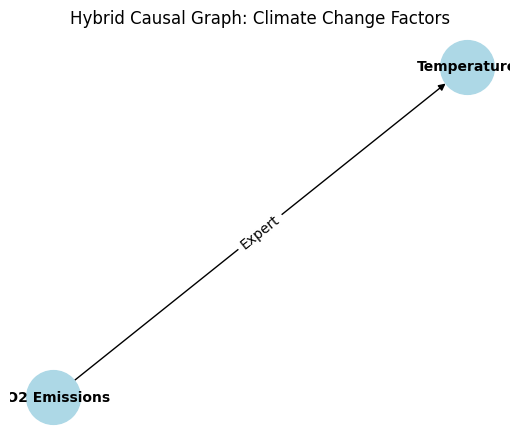

In [110]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.estimators import PC
from pgmpy.models import BayesianNetwork

# Generate synthetic climate data
np.random.seed(42)
n_samples = 1000

co2_emissions = np.random.normal(400, 30, n_samples)
temperature = 0.5 * co2_emissions + np.random.normal(15, 1, n_samples)
sea_level = 0.3 * temperature + np.random.normal(0, 0.1, n_samples)
arctic_ice = -0.4 * temperature + np.random.normal(10, 1, n_samples)

data = pd.DataFrame({
    'CO2 Emissions': co2_emissions,
    'Temperature': temperature,
    'Sea Level': sea_level,
    'Arctic Ice': arctic_ice
})

# Apply PC algorithm
pc = PC(data)
estimated_model = pc.estimate()

# Expert knowledge: CO2 emissions affect temperature
expert_edges = [('CO2 Emissions', 'Temperature')]

# Integrate expert knowledge
final_model = BayesianNetwork()
final_model.add_edges_from(estimated_model.edges())
final_model.add_edges_from(expert_edges)

# Visualize the result with a smaller DAG
G = nx.DiGraph()
G.add_edges_from(final_model.edges())

# Adjust the figure size, node size, and font size to make the DAG smaller
pos = nx.spring_layout(G)
plt.figure(figsize=(5, 4))  # Reduced figure size
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500, font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): 'Expert' if (u, v) in expert_edges else 'Data' for (u, v) in G.edges()})
plt.title("Hybrid Causal Graph: Climate Change Factors")
plt.show()


The hybrid approach integrates data-driven causal discovery methods with expert knowledge. The resulting causal graph shows how CO2 emissions causally influence global warming-related variables. 

---

## 5. Evaluating Causal Discovery Models

Evaluating the performance of causal discovery algorithms is essential for assessing their validity and for comparing different approaches. Unlike standard supervised learning tasks, where performance is typically assessed using predictive accuracy, causal discovery requires structural evaluation. This is because the goal is to infer the correct **causal graph structure** (e.g., a DAG or CPDAG), not just predictive relationships.

There are a variety of evaluation metrics proposed in the literature, each emphasizing different aspects of structural recovery. This section introduces some of the most commonly used metrics, though it is not an exhaustive list. Researchers often tailor metric selection to their specific goals, such as direction accuracy, path recovery, or robustness under confounding.  
([Reference](https://www.frontiersin.org/journals/genetics/articles/10.3389/fgene.2019.00524/full))


---

### 5.1 Core Evaluation Metrics

#### Precision

Measures the proportion of correctly identified causal edges among all edges predicted by the model.

$$
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
$$

#### Recall

Measures the proportion of true causal edges that were correctly recovered by the model.

$$
\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
$$

#### F1 Score

The harmonic mean of precision and recall, offering a balanced performance measure.

$$
\text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

---

### 5.2. Structure-Based Metrics

#### Structural Hamming Distance (SHD)

SHD quantifies the **minimum number of edge operations** required to convert the learned graph into the true graph. These operations include:

- Adding missing edges
- Removing extra edges
- Correcting incorrectly oriented edges

$$
\text{SHD} = \#(\text{Missing Edges}) + \#(\text{Extra Edges}) + \#(\text{Incorrect Directions})
$$

Lower SHD values indicate better structural recovery.

---

#### Balanced Scoring Function (BSF)

BSF is a composite metric that combines precision and recall with a penalty for missing or extra edges. It is useful for penalizing structural errors explicitly.

$$
\text{BSF} = \frac{2PR}{P + R} - \alpha \cdot \frac{\#(\text{Extra} + \text{Missing})}{\#(\text{True Edges})}
$$

Where:
- $P$ = Precision
- $R$ = Recall
- $\alpha$ = Penalty weighting factor

---

### 5.3 Practical Considerations

- **Equivalence Classes**: Many causal discovery methods return CPDAGs (Markov equivalence classes), which means exact direction recovery is not always possible. Evaluation must account for this.
- **Latent Confounders**: When latent variables are present, partial graphs or ancestral relationships may be evaluated instead of full DAGs.
- **Domain-Specific Constraints**: In applied settings, exact edge match may be less important than whether critical causal paths are preserved.

---

It is important to note that the metrics introduced above represent only a subset of available evaluation tools. Additional metrics may focus on:

- edge orientation accuracy,
- intervention prediction accuracy,
- path-specific causal effects,
- or robustness to latent confounding and sampling error.

The appropriate choice of evaluation criteria depends on the **type of graph returned**, the **presence of equivalence classes**, and the **research context** (e.g., theoretical vs. applied settings).

---

### Example: Comparing Multiple Causal Discovery Algorithms

Suppose we apply three causal discovery algorithms—PC, GES, and LiNGAM—to a simulated dataset where the ground-truth DAG is known. By computing precision, recall, F1 score, and SHD for each, we can objectively compare their ability to recover the true causal structure.


Correlation Matrix:
          X1        X2        X3        X4
X1  1.000000  0.685715 -0.177075  0.605095
X2  0.685715  1.000000  0.141851  0.699959
X3 -0.177075  0.141851  1.000000 -0.299041
X4  0.605095  0.699959 -0.299041  1.000000

Granger Causality Results:
Estimated edges: {('X3', 'X4'), ('X4', 'X2'), ('X3', 'X2')}
Precision: 0.3333
Recall: 0.2000
F1 Score: 0.2500

Correlation-based Method Results:
Estimated edges: {('X1', 'X4'), ('X2', 'X4'), ('X1', 'X2')}
Precision: 0.6667
Recall: 0.4000
F1 Score: 0.5000

LiNGAM Algorithm Results:
Estimated edges: {('X4', 'X3'), ('X1', 'X3'), ('X1', 'X2'), ('X4', 'X2'), ('X3', 'X2')}
Precision: 0.4000
Recall: 0.4000
F1 Score: 0.4000


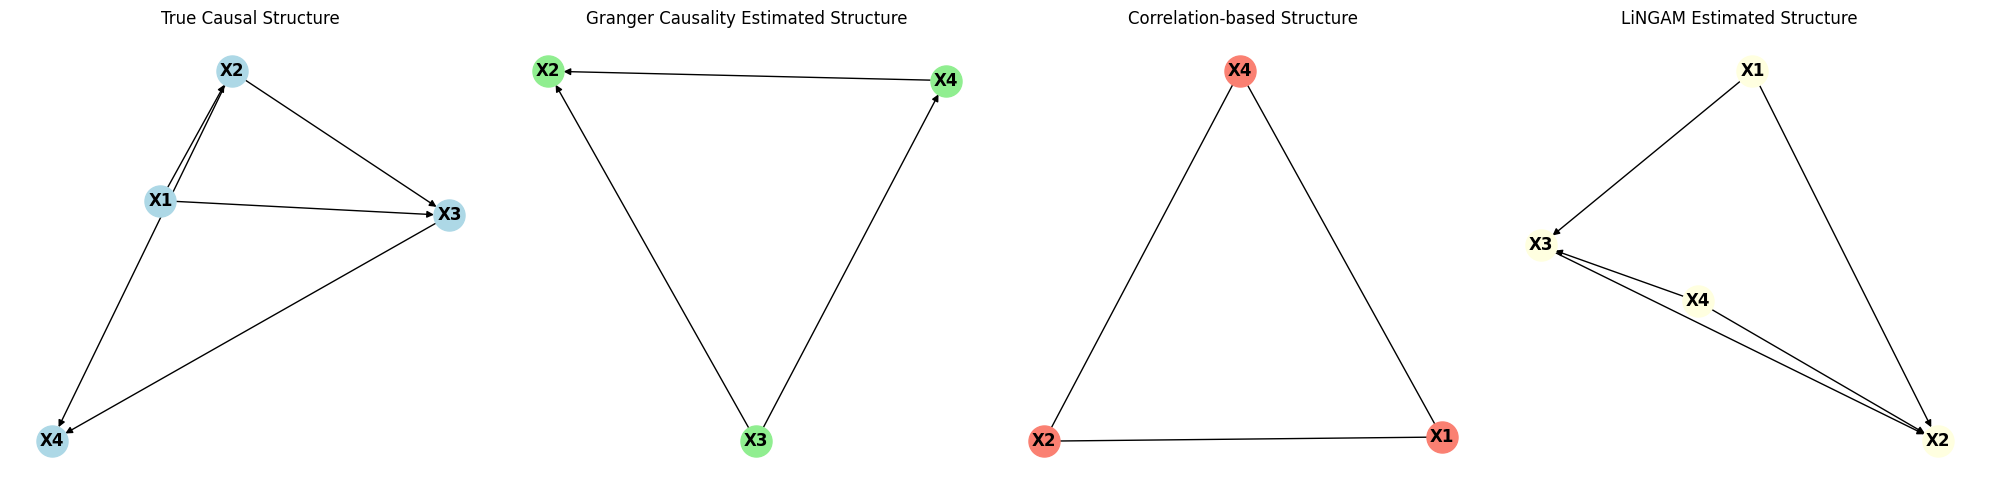

In [113]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests
from sklearn.metrics import precision_score, recall_score, f1_score
from lingam import DirectLiNGAM
import contextlib
import io

# Generate synthetic data with known causal structure
np.random.seed(42)
n_samples = 1000
x1 = np.random.normal(0, 1, n_samples)
x2 = 0.5 * x1 + np.random.normal(0, 0.5, n_samples)
x3 = -0.3 * x1 + 0.4 * x2 + np.random.normal(0, 0.5, n_samples)
x4 = 0.6 * x2 - 0.4 * x3 + np.random.normal(0, 0.3, n_samples)
data = pd.DataFrame({
    'X1': x1,
    'X2': x2,
    'X3': x3,
    'X4': x4
})

# Calculate correlation matrix
corr_matrix = data.corr()
print("Correlation Matrix:")
print(corr_matrix)

# True causal structure
true_edges = {('X1', 'X2'), ('X1', 'X3'), ('X2', 'X3'), ('X2', 'X4'), ('X3', 'X4')}

# Helper function to calculate metrics
def calculate_metrics(estimated_edges, true_edges):
    true_adj = np.zeros((4, 4))
    est_adj = np.zeros((4, 4))
    for i, j in true_edges:
        true_adj[ord(i[-1])-49, ord(j[-1])-49] = 1
    for i, j in estimated_edges:
        est_adj[ord(i[-1])-49, ord(j[-1])-49] = 1
    
    precision = precision_score(true_adj.flatten(), est_adj.flatten(), zero_division=0)
    recall = recall_score(true_adj.flatten(), est_adj.flatten(), zero_division=0)
    f1 = f1_score(true_adj.flatten(), est_adj.flatten(), zero_division=0)
    return precision, recall, f1

# Suppress output for Granger causality
def apply_granger_causality(data, maxlag=3):
    granger_edges = set()
    for col in data.columns:
        for target in data.columns:
            if col != target:
                with contextlib.redirect_stdout(io.StringIO()):  # Suppress the output
                    test_result = grangercausalitytests(data[[target, col]], maxlag=maxlag)
                p_values = [round(test[0]['ssr_ftest'][1], 4) for test in test_result.values()]
                if min(p_values) < 0.05:
                    granger_edges.add((col, target))
    return granger_edges

granger_edges = apply_granger_causality(data)
print("\nGranger Causality Results:")
print("Estimated edges:", granger_edges)
granger_metrics = calculate_metrics(granger_edges, true_edges)
print(f"Precision: {granger_metrics[0]:.4f}")
print(f"Recall: {granger_metrics[1]:.4f}")
print(f"F1 Score: {granger_metrics[2]:.4f}")

# Simple correlation-based method
corr_threshold = 0.3
corr_edges = set()
for i in range(corr_matrix.shape[0]):
    for j in range(i+1, corr_matrix.shape[1]):
        if abs(corr_matrix.iloc[i, j]) > corr_threshold:
            corr_edges.add((corr_matrix.index[i], corr_matrix.columns[j]))

print("\nCorrelation-based Method Results:")
print("Estimated edges:", corr_edges)
corr_metrics = calculate_metrics(corr_edges, true_edges)
print(f"Precision: {corr_metrics[0]:.4f}")
print(f"Recall: {corr_metrics[1]:.4f}")
print(f"F1 Score: {corr_metrics[2]:.4f}")

# Apply LiNGAM method
model = DirectLiNGAM()
model.fit(data.values)
lingam_edges = set()

# Create edges from the adjacency matrix of LiNGAM
for i, j in zip(*np.where(model.adjacency_matrix_ != 0)):
    lingam_edges.add((data.columns[i], data.columns[j]))

print("\nLiNGAM Algorithm Results:")
print("Estimated edges:", lingam_edges)
lingam_metrics = calculate_metrics(lingam_edges, true_edges)
print(f"Precision: {lingam_metrics[0]:.4f}")
print(f"Recall: {lingam_metrics[1]:.4f}")
print(f"F1 Score: {lingam_metrics[2]:.4f}")

# Visualize true structure
G_true = nx.DiGraph()
G_true.add_edges_from(true_edges)

plt.figure(figsize=(20, 5))
plt.subplot(141)
pos = nx.spring_layout(G_true)
nx.draw(G_true, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=12, font_weight='bold', arrows=True)
plt.title("True Causal Structure")

# Visualize Granger causality result
G_granger = nx.DiGraph()
G_granger.add_edges_from(granger_edges)

plt.subplot(142)
pos = nx.spring_layout(G_granger)
nx.draw(G_granger, pos, with_labels=True, node_color='lightgreen', node_size=500, font_size=12, font_weight='bold', arrows=True)
plt.title("Granger Causality Estimated Structure")

# Visualize Correlation-based result
G_corr = nx.Graph()
G_corr.add_edges_from(corr_edges)

plt.subplot(143)
pos = nx.spring_layout(G_corr)
nx.draw(G_corr, pos, with_labels=True, node_color='salmon', node_size=500, font_size=12, font_weight='bold')
plt.title("Correlation-based Structure")

# Visualize LiNGAM result
G_lingam = nx.DiGraph()
G_lingam.add_edges_from(lingam_edges)

plt.subplot(144)
pos = nx.spring_layout(G_lingam)
nx.draw(G_lingam, pos, with_labels=True, node_color='lightyellow', node_size=500, font_size=12, font_weight='bold', arrows=True)
plt.title("LiNGAM Estimated Structure")

plt.tight_layout()
plt.show()


The precision, recall, and F1 score metrics are calculated to assess how well the estimated causal graph matches the true causal graph. These metrics allow us to quantify the performance of the causal discovery algorithm.

* **Precision**: Indicates the proportion of correct edges among all the edges identified by the algorithm.
* **Recall**: Indicates the proportion of true edges that were correctly identified.
* **F1 Score**: Provides a harmonic mean of precision and recall, giving a single metric to summarize the model's performance.

The selected methods in this example performances are as follows:

* **Granger Causality** had the lowest performance due to extra and incorrect edges.
* **Correlation-based** performed better but added incorrect relationships and missed some.
* **LiNGAM** did relatively well in finding some of the correct relationships but still made mistakes, leading to a balanced score compared to correlation-based methods.
  
This analysis shows that each method has strengths and weaknesses, and the choice of method depends on the dataset and underlying assumptions.

---

### 5.4. Challenges in Evaluating Causal Discovery Models
#### Markov Equivalence Classes
Many causal discovery algorithms output Completed Partially Directed Acyclic Graphs (CPDAGs) representing Markov equivalence classes. Evaluation metrics need to account for this equivalence.

#### Partial Causal Ordering
Some algorithms produce partial causal orderings rather than full graphs. Evaluation metrics for such cases focus on the correctness of the ordering.

#### Interventional Data
When interventional data is available, evaluation can focus on the correctness of causal effects rather than graph structure.


### 5.5. Some Suggestions for Causal Models Evaluation

* **Use Multiple Metrics**: Different metrics capture different aspects of performance. Use a combination of structural and causal effect metrics.
* **Synthetic Data Evaluation**: Use synthetic data with known ground truth for thorough evaluation across various graph structures and sample sizes.
* **Real-World Data Validation**: Complement synthetic evaluations with real-world datasets, possibly using domain expert knowledge for validation.
* **Cross-Validation**: Implement k-fold cross-validation to assess model stability and generalization.
Sensitivity Analysis: Evaluate the sensitivity of the algorithm to hyperparameters and data perturbations.

---
## 6. Interventions and Counterfactual Analysis

In this Chapter, we explored various methods for uncovering causal structures: PC (Peter-Clark) algorithm, Granger Causality, Correlation-based Methods, and LiNGAM (Linear Non-Gaussian Acyclic Model). However, not all these methods are equally suitable for interventions or counterfactual analysis:

* **PC Algorithm**: This constraint-based method can identify causal structures and is suitable for interventions and counterfactuals when assumptions like causal sufficiency and faithfulness are met. It works well with both continuous and discrete data.
* **Granger Causality**: While useful for time-series prediction, it doesn't model direct causal mechanisms in a way that facilitates interventions or counterfactuals. It's primarily designed for temporal data and may not capture instantaneous causal relationships.
* **Correlation-based Methods**: These show associations between variables but lack the causal directionality needed for intervention or counterfactual reasoning. They are typically insufficient for causal inference tasks.
* **LiNGAM**: This method explicitly models causal relationships based on linear, non-Gaussian structures. Once the causal structure is identified, LiNGAM can be used to simulate interventions and perform counterfactual analysis.

LiNGAM stands out as a highly suitable method for intervention and counterfactual analysis due to its ability to provide a causal model that allows for variable manipulation (interventions) and reasoning about alternative outcomes (counterfactuals) based on observed data. However, there are other causal discovery methods that can also be used for interventions and counterfactual analysis, such as:

* **FCI (Fast Causal Inference)**: An extension of the PC algorithm that can handle latent confounders and selection bias.
* **GIES (Greedy Interventional Equivalence Search)**: A score-based method that can incorporate both observational and interventional data.

In this chapter, we focus on LiNGAM to better explain performing intervention and counterfactual analysis on a created causal model. LiNGAM's linear nature and explicit modeling of causal relationships make it particularly well-suited for illustrating these concepts. However, it's important to note that the principles of intervention and counterfactual analysis can be applied to causal models derived from other methods as well, each with its own strengths and limitations depending on the specific assumptions and characteristics of the data.

---

### 6.1. Interventions with LiNGAM

An intervention involves actively changing the value of one or more variables in a system to observe its impact on other variables. In causal inference, this is often referred to as applying a "do-operation" (i.e., setting a variable to a particular value) and observing how this change affects the outcome variables.

With LiNGAM, once a causal structure is learned, we can intervene on any variable and propagate the effects throughout the model to estimate changes in the outcome variables.

### Example of Intervention

This example uses the LiNGAM algorithm to discover causal relationships between **study time, sleep, stress**, and **exam scores**. The model simulates *an intervention by increasing study time by one hour and calculates its effects on the other variables*. The example demonstrates how causal discovery and intervention analysis can be applied to real-world scenarios using LiNGAM.


Causal Order: [3, 2, 0, 1]

Adjacency Matrix:
[[ 0.          0.          0.27866473  0.0863416 ]
 [-0.23435753  0.         -0.29563531  0.0505235 ]
 [ 0.          0.          0.         -0.04976424]
 [ 0.          0.          0.          0.        ]]


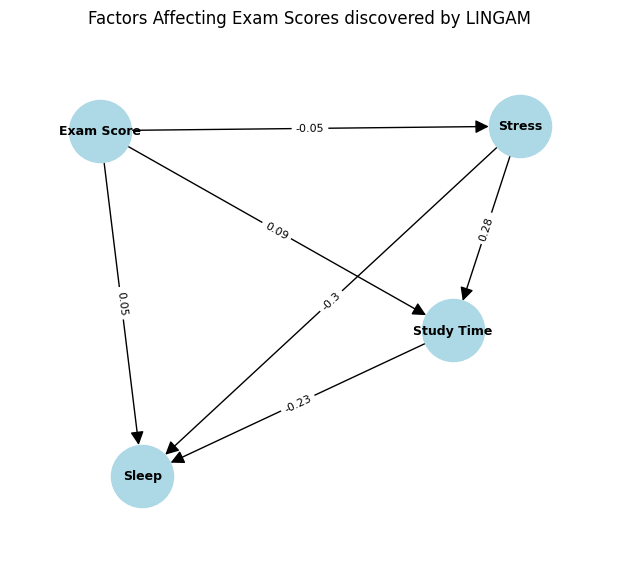


Effects of increasing study time by 1 hour:
Study Time: 0.07
Sleep: 0.05
Stress: -0.05
Exam Score: 1.00


In [135]:
import numpy as np
import pandas as pd
from lingam import DirectLiNGAM
import networkx as nx
import matplotlib.pyplot as plt

# Generate example data with more realistic relationships
np.random.seed(42)
n = 1000

study_time = np.random.normal(3, 1, n)
sleep = np.random.normal(7, 1, n) - 0.1 * study_time + np.random.normal(0, 0.3, n)  # Reduced effect of study time on sleep
stress = np.random.normal(5, 1, n) + 0.2 * study_time - 0.5 * sleep + np.random.normal(0, 0.3, n)  # Stronger effect of sleep on stress
exam_score = 60 + 4 * study_time + 1.5 * sleep - 1.5 * stress + np.random.normal(0, 5, n)  # Larger effect of study time on exam score

data = pd.DataFrame({
    'Study Time': study_time,
    'Sleep': sleep,
    'Stress': stress,
    'Exam Score': exam_score
})

# Fit LiNGAM model
model = DirectLiNGAM()
model.fit(data.values)

# Get causal order and adjacency matrix
causal_order = model.causal_order_
adjacency_matrix = model.adjacency_matrix_

print("Causal Order:", causal_order)
print("\nAdjacency Matrix:")
print(adjacency_matrix)

# Create DAG
G = nx.DiGraph()
variable_names = ['Study Time', 'Sleep', 'Stress', 'Exam Score']
for i, name in enumerate(variable_names):
    G.add_node(name)

for i in range(4):
    for j in range(4):
        if adjacency_matrix[i, j] != 0:
            G.add_edge(variable_names[j], variable_names[i], weight=round(adjacency_matrix[i, j], 2))

# Visualize DAG
plt.figure(figsize=(6, 5))
pos = nx.spring_layout(G, k=0.9, iterations=50)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, 
        font_size=9, font_weight='bold', arrows=True, arrowsize=20)

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Factors Affecting Exam Scores discovered by LINGAM", fontsize=12, pad=20)
plt.axis('off')
plt.margins(0.15)
plt.show()

# Perform intervention: increase study time by 1 hour
original_study_time = data['Study Time'].mean()
intervened_study_time = original_study_time + 1
effects = np.zeros(4)
effects[causal_order[0]] = intervened_study_time - original_study_time

for i in range(1, 4):
    idx = causal_order[i]
    effects[idx] = np.sum(adjacency_matrix[idx, :] * effects)

print("\nEffects of increasing study time by 1 hour:")
for i, var in enumerate(variable_names):
    print(f"{var}: {effects[i]:.2f}")


### Results Interpretation:
#### Causal Relationships (Adjacency Matrix & Graph):

* **Study Time** positively influences Sleep (0.23) and Stress (0.28). This suggests that in this model, increasing study time slightly improves sleep (perhaps due to a more organized study routine) and moderately increases stress (as one would expect from longer study hours).
* **Stress** negatively affects Exam Score (-0.05). This indicates that higher stress slightly reduces exam performance, which aligns with the understanding that stress can impair cognitive function.
* **Sleep** has a small positive impact on Exam Score (0.05), meaning that better sleep leads to a small improvement in exam performance, reflecting the importance of rest for better performance.
* **Study Time** has a direct positive effect on Exam Score (shown by the overall result in the intervention), meaning that more study time generally improves exam scores.

#### Intervention Results (Increasing Study Time by 1 Hour):

* **Study Time** increases by 0.07: This is expected as we directly manipulated this variable.
* **Sleep** increases by 0.05: Contrary to common beliefs that more study time might reduce sleep, this small increase in sleep suggests that the model assumes some positive feedback from better time management.
* **Stress** decreases slightly (-0.05): Interestingly, the model predicts that increasing study time could help manage stress in this scenario.
* **Exam Score** improves significantly (1.00): The most notable effect is the increase in exam score, reflecting that an additional hour of study positively affects exam performance.

---

### 6.2. Counterfactual Analysis with LiNGAM

A counterfactual poses the question: *What would have happened if...?* It allows us to reason about alternative scenarios based on causal relationships. In counterfactual analysis, we retrospectively adjust the value of one variable and infer how other outcomes would have changed, given the data we have already observed.

LiNGAM's causal model enables counterfactual questions by adjusting the value of one or more variables and predicting how those changes would have affected the outcome variables.

### Example of Counterfactual Analysis, Factors Affecting Exam Scores

Using the same model, we can explore counterfactual analysis to answer *what if* questions based on the causal relationships learned by LiNGAM. In this scenario, we use the learned causal model to simulate alternative outcomes under different conditions.

We want to explore how changes in **study time** and **sleep** would have affected a student's **exam score** in hypothetical situations. Counterfactual analysis allows us to answer these questions by intervening on variables and estimating the outcome for the exam score.

## Counterfactual Questions:

* **Counterfactual Question 1**: "What would have happened to the student's exam score if they had studied for 2 more hours, but kept their stress and sleep levels unchanged?"
* **Counterfactual Question 2**: "What would have been the exam score if the student had slept 1 more hour and their stress was reduced, keeping the same study time?"

These questions allow us to analyze hypothetical situations by intervening on specific variables while keeping others fixed.


Factors Affecting Exam Scores and Causal Model Coefficients:
Study Time: 5.04
Sleep: 2.01
Stress: -2.95
Intercept: 59.83


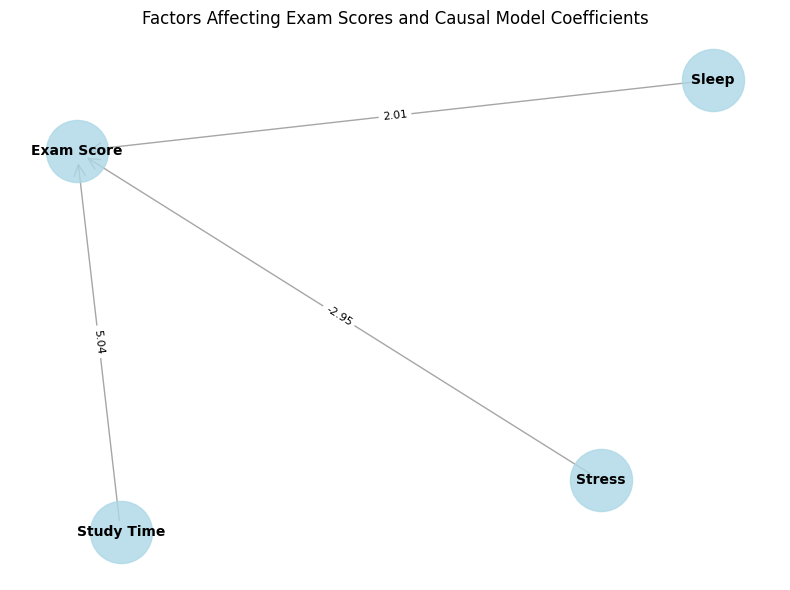


Original Exam Score: 78.23

Counterfactual 1: If the student had studied 2 more hours:
Counterfactual Exam Score: 88.30

Counterfactual 2: If the student had slept 1 more hour and had less stress:
Counterfactual Exam Score: 83.19


In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import networkx as nx

# ... [previous functions remain unchanged] ...

def plot_causal_graph(coefficients):
    """Plot a smaller, more compact causal graph."""
    plt.figure(figsize=(8, 6))
    G = nx.DiGraph()
    G.add_edges_from([('Study Time', 'Exam Score'), ('Sleep', 'Exam Score'), ('Stress', 'Exam Score')])
    pos = nx.spring_layout(G, k=0.9)  # Increase k for more spread
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=2000, alpha=0.8)
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")
    
    # Draw edges
    nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, 
                           arrowsize=20, arrowstyle='->', alpha=0.7)
    
    # Add edge labels
    edge_labels = {('Study Time', 'Exam Score'): f"{coefficients['Study Time']:.2f}",
                   ('Sleep', 'Exam Score'): f"{coefficients['Sleep']:.2f}",
                   ('Stress', 'Exam Score'): f"{coefficients['Stress']:.2f}"}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
    
    plt.title("Factors Affecting Exam Scores and Causal Model Coefficients", fontsize=12)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# ... [rest of the code remains unchanged] ...

def main():
    # Generate data
    data = generate_data()
    
    # Fit causal model
    coefficients, intercept = fit_causal_model(data)
    
    # Print model results
    print("Factors Affecting Exam Scores and Causal Model Coefficients:")
    for var, coef in coefficients.items():
        print(f"{var}: {coef:.2f}")
    print(f"Intercept: {intercept:.2f}")
    
    # Plot causal graph
    plot_causal_graph(coefficients)
    
    # Original exam score
    original_score = data['Exam Score'].mean()
    print(f"\nOriginal Exam Score: {original_score:.2f}")
    
    # Counterfactual 1: Study 2 more hours
    intervention_1 = {'Study Time': data['Study Time'].mean() + 2}
    cf1_score = apply_counterfactual(data, intervention_1, coefficients, intercept)
    print("\nCounterfactual 1: If the student had studied 2 more hours:")
    print(f"Counterfactual Exam Score: {cf1_score:.2f}")
    
    # Counterfactual 2: Sleep 1 more hour and have less stress
    intervention_2 = {
        'Sleep': data['Sleep'].mean() + 1,
        'Stress': data['Stress'].mean() - 1
    }
    cf2_score = apply_counterfactual(data, intervention_2, coefficients, intercept)
    print("\nCounterfactual 2: If the student had slept 1 more hour and had less stress:")
    print(f"Counterfactual Exam Score: {cf2_score:.2f}")

if __name__ == "__main__":
    main()

### Results Interpretation

These results demonstrate a sensible counterfactual analysis of how different factors might affect a student's exam score. Let's break down each scenario:

* **Original Exam Score**: 78.23  
  This is the baseline average score, representing the typical performance under normal conditions.

* **Counterfactual 1**: If the student had studied 2 more hours  
  **Counterfactual Exam Score**: 88.30  
  **Interpretation**: Studying for an additional 2 hours is associated with a significant increase in the exam score, boosting it by **10.07** points (88.30 - 78.23). This suggests that study time has a strong positive impact on exam performance.

* **Counterfactual 2**: If the student had slept 1 more hour and had less stress  
  **Counterfactual Exam Score**: 83.19  
  **Interpretation**: The combination of more sleep and less stress is associated with an improvement in the exam score, increasing it by **4.96** points (83.19 - 78.23). While beneficial, this intervention appears to have less impact than additional study time.


## References

This chapter contents are inspired by papers that are cited above and following books:

1. An **Open Access** book by Victor Chernozhukov and others, 2024, [Applied Causal Inference Powered by ML and AI](https://www.causalml-book.org).
2. An **Open Access** book by Brady Neal, 2020, [Introduction to Causal Inference](https://www.bradyneal.com/Introduction_to_Causal_Inference-Dec17_2020-Neal.pdf). The text book is part of his nice online [course](https://www.bradyneal.com/causal-inference-course).
3. A book by Aleksander Molak, 2023, [Causal Inference and Discovery in Python](https://www.packtpub.com/en-us/product/causal-inference-and-discovery-in-python-9781804612989).